# Loan Application Status Prediction
Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 



In [1]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('loan_prediction.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Target suggests that this is a classification problem

In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Mix of data types

In [7]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Filling null values with mode or mean
print (data["Gender"].mode())
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
print (data["Married"].mode())
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
print (data["Dependents"].mode())
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
print (data["Self_Employed"].mode())
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
print (data["LoanAmount"].mean())
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())
print (data["Loan_Amount_Term"].mean())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
print (data["Credit_History"].mean())
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mean())

0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    0
Name: Dependents, dtype: object
0    No
Name: Self_Employed, dtype: object
146.41216216216216
342.0
0.8421985815602837


In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No null values 

In [13]:
#checking the unique values
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
#Dropping irrelevant data
data.drop(columns=["Loan_ID"], axis=1, inplace=True)

In [17]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

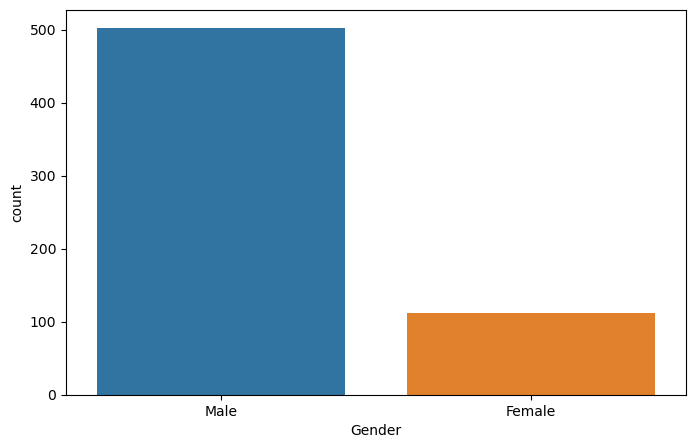

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data['Gender'])
plt.show()

Male is significantly higher. I will have to bare this in mind. 

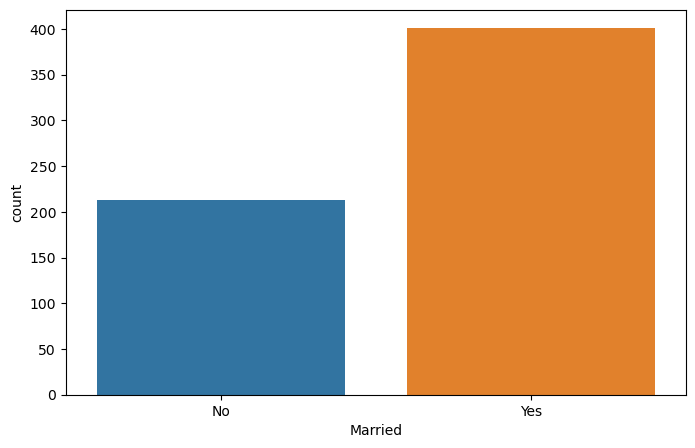

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data['Married'])
plt.show()

Married people higher than not married

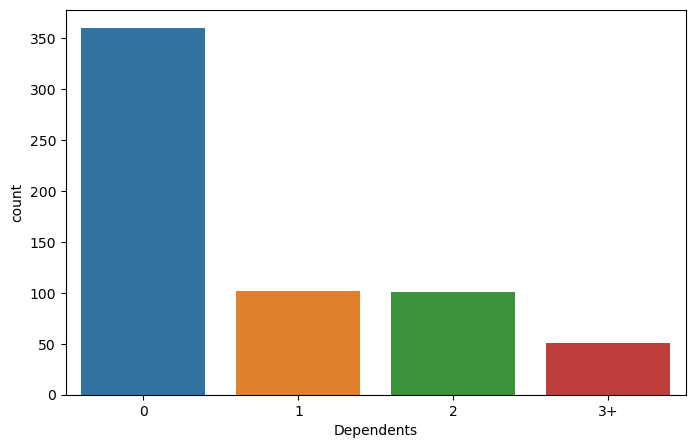

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data['Dependents'])
plt.show()

Highest amount of people without children

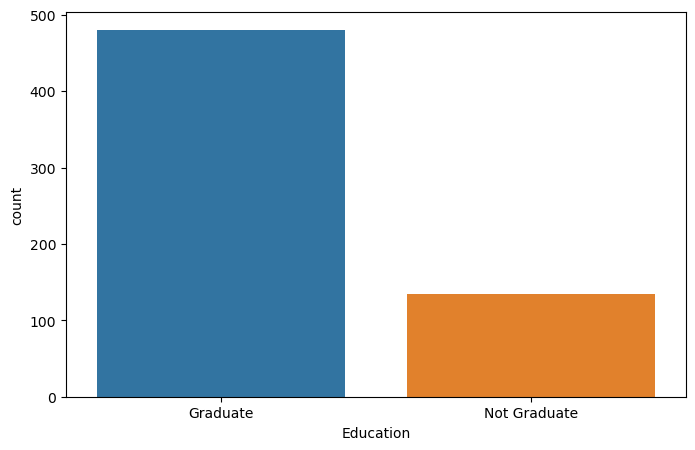

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data['Education'])
plt.show()

Graduates higher than non-graduates

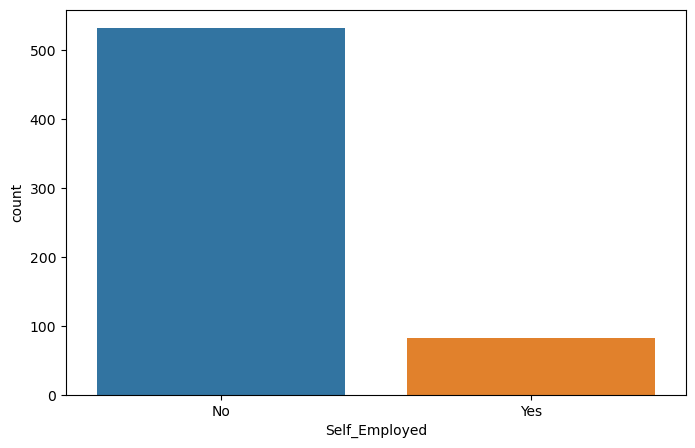

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data['Self_Employed'])
plt.show()

Majority of applicants not self-employed

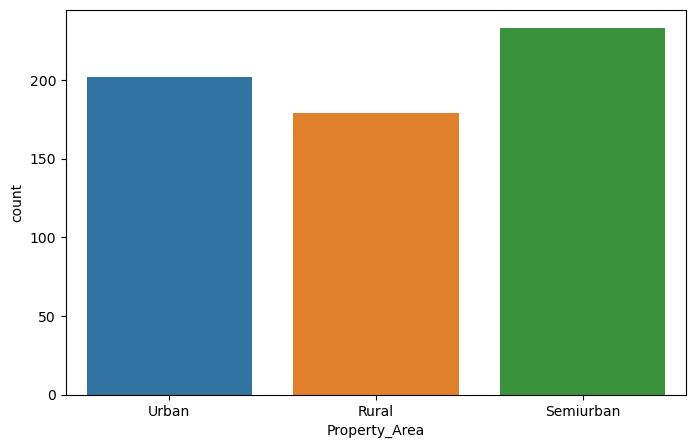

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data['Property_Area'])
plt.show()

semi-urban is the highest count of applicants

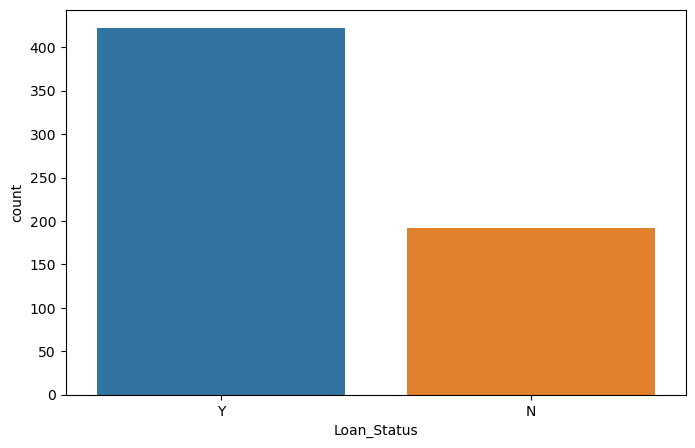

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data['Loan_Status'])
plt.show()

Majority of applications accepted

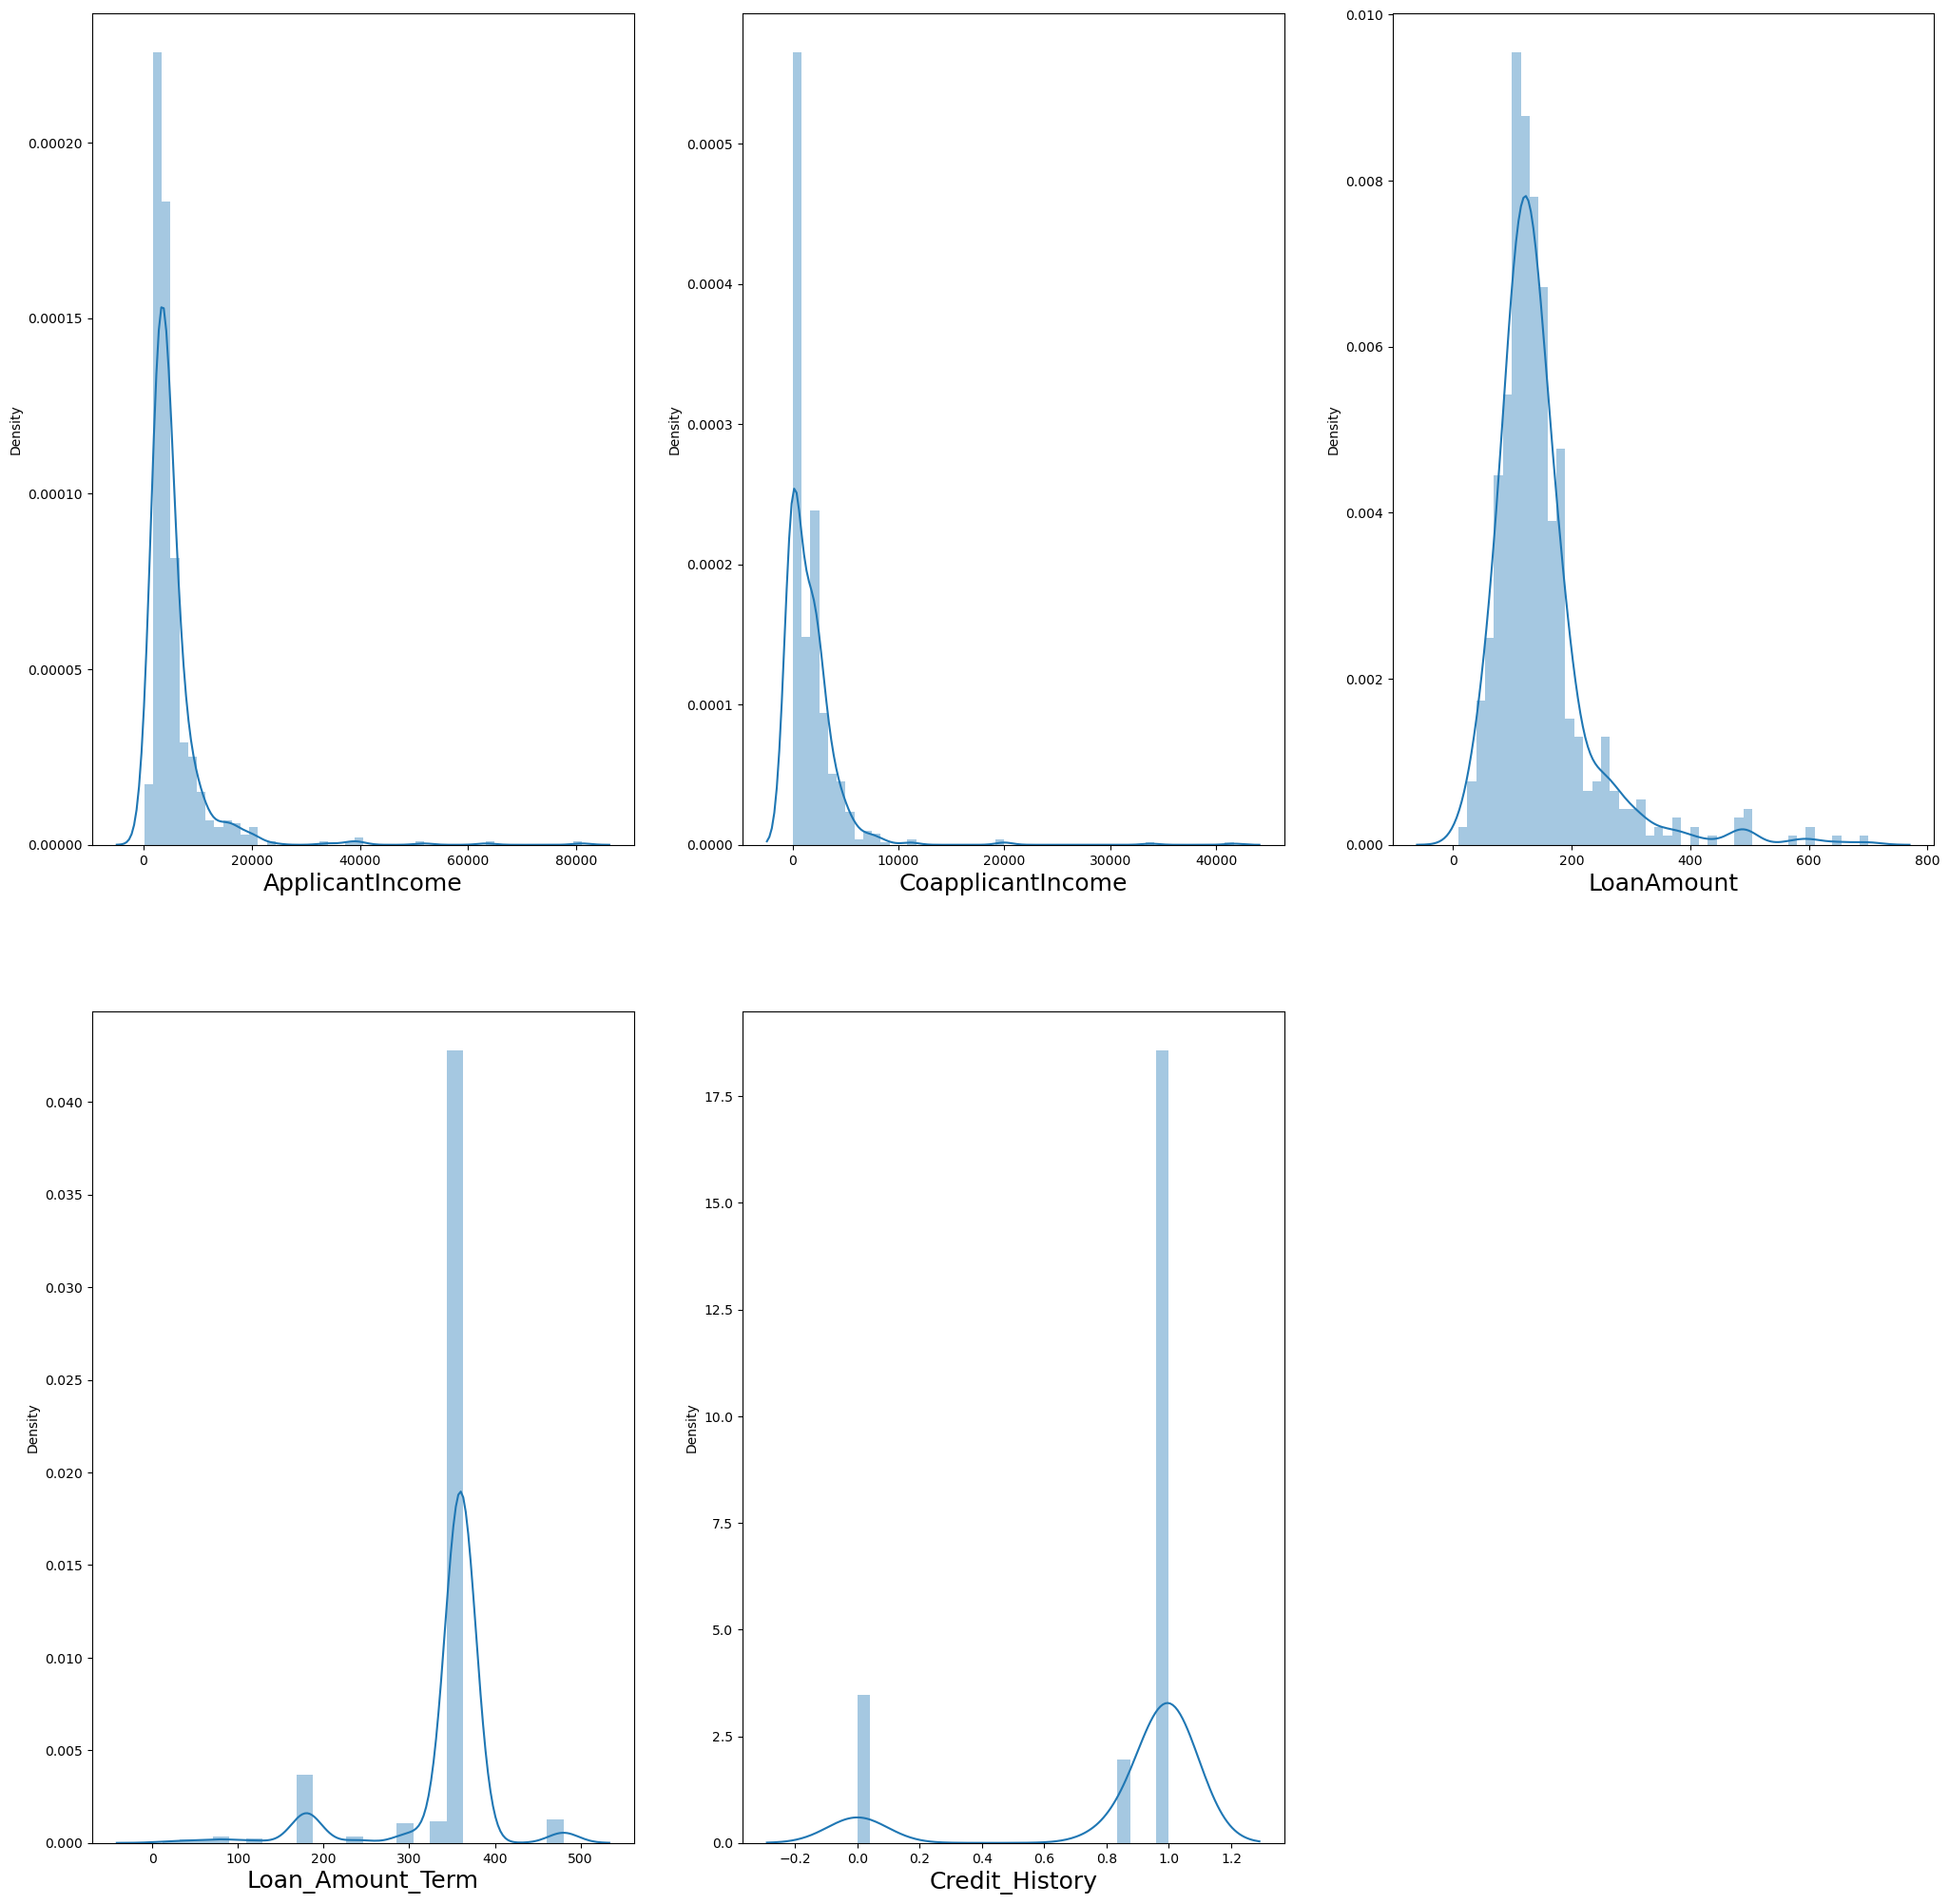

In [25]:
#Check the distribution in the numerical columns 
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

Left and right skew present in dataset

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


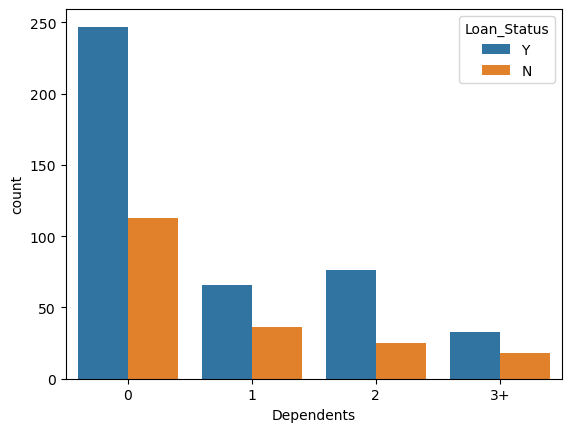

In [32]:
#explore features in relation with target 
print(data["Dependents"].value_counts())
sns.countplot(data["Dependents"],hue=data["Loan_Status"])
plt.show()

Majority of applicants approved regardless of dependents. Applicants with 3+ children were less likely to be accepted

Male      502
Female    112
Name: Gender, dtype: int64


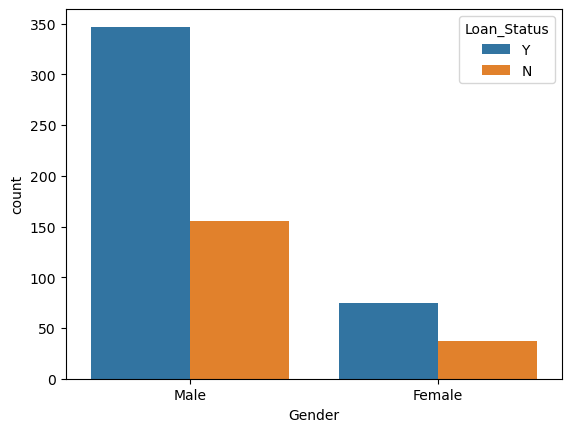

In [29]:
#explore features in relation with target 
print(data["Gender"].value_counts())
sns.countplot(data["Gender"],hue=data["Loan_Status"])
plt.show()

As the count of men is higher, they are getting accepted and rejected higher than females

Yes    401
No     213
Name: Married, dtype: int64


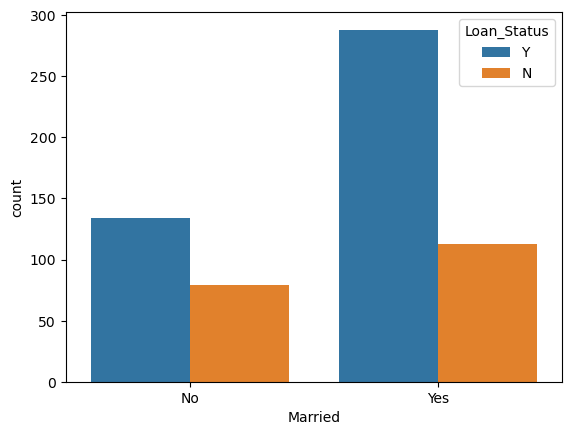

In [33]:
print(data["Married"].value_counts())
sns.countplot(data["Married"],hue=data["Loan_Status"])
plt.show()

Marriage doesn't seem to be too significant. The count was higher for married people, which would explain these findings

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


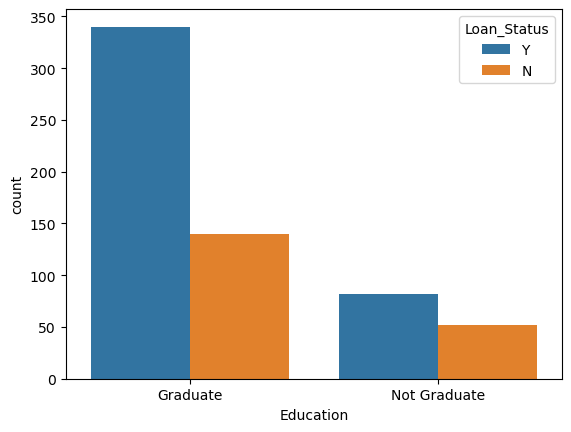

In [34]:
print(data["Education"].value_counts())
sns.countplot(data["Education"],hue=data["Loan_Status"])
plt.show()

Graduates are more likely to be approved

No     532
Yes     82
Name: Self_Employed, dtype: int64


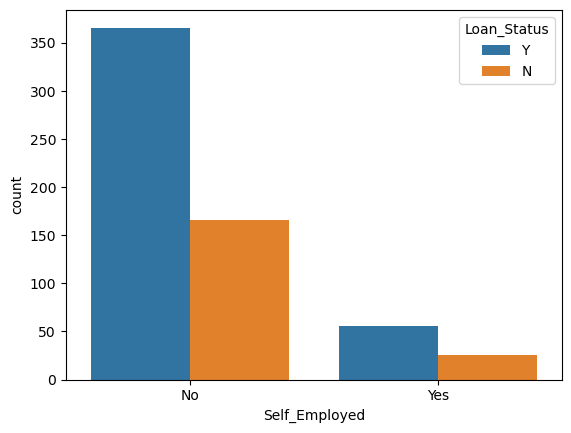

In [35]:
print(data["Self_Employed"].value_counts())
sns.countplot(data["Self_Employed"],hue=data["Loan_Status"])
plt.show()

People who are self employed are less likely to be accepted based on this, however, the count for self emplyed was significantly less

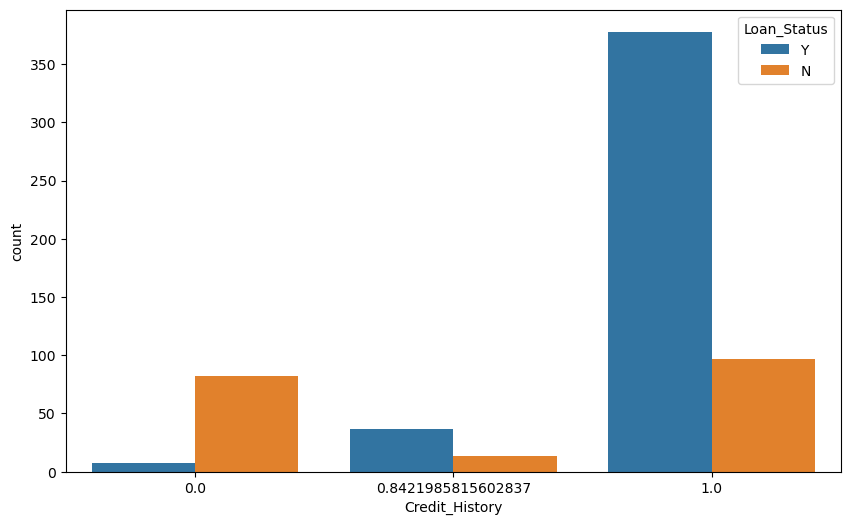

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(data["Credit_History"], hue=data["Loan_Status"])
plt.show()

Having a credit history is unsurprisingly essential when being accepted. Unsure as to what the 0.842 illudes to

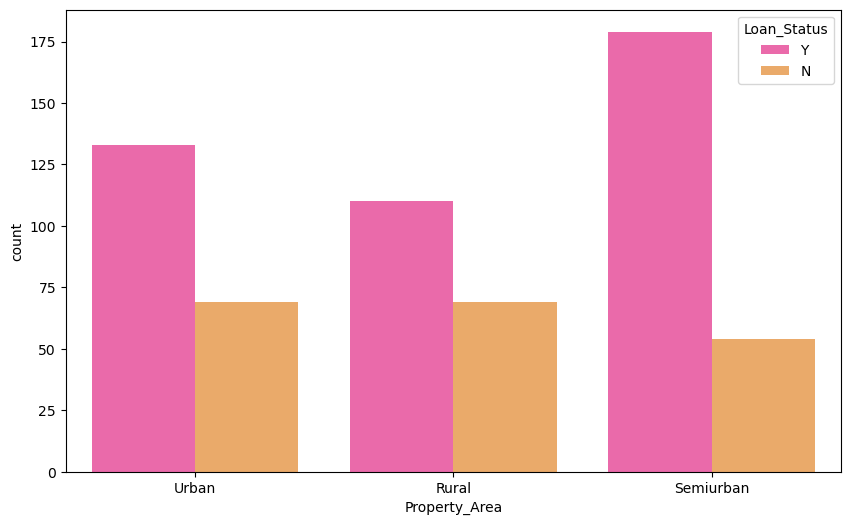

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(data["Property_Area"],hue=data["Loan_Status"],palette="spring")
plt.show()

Area doesn't have much significance on approval

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


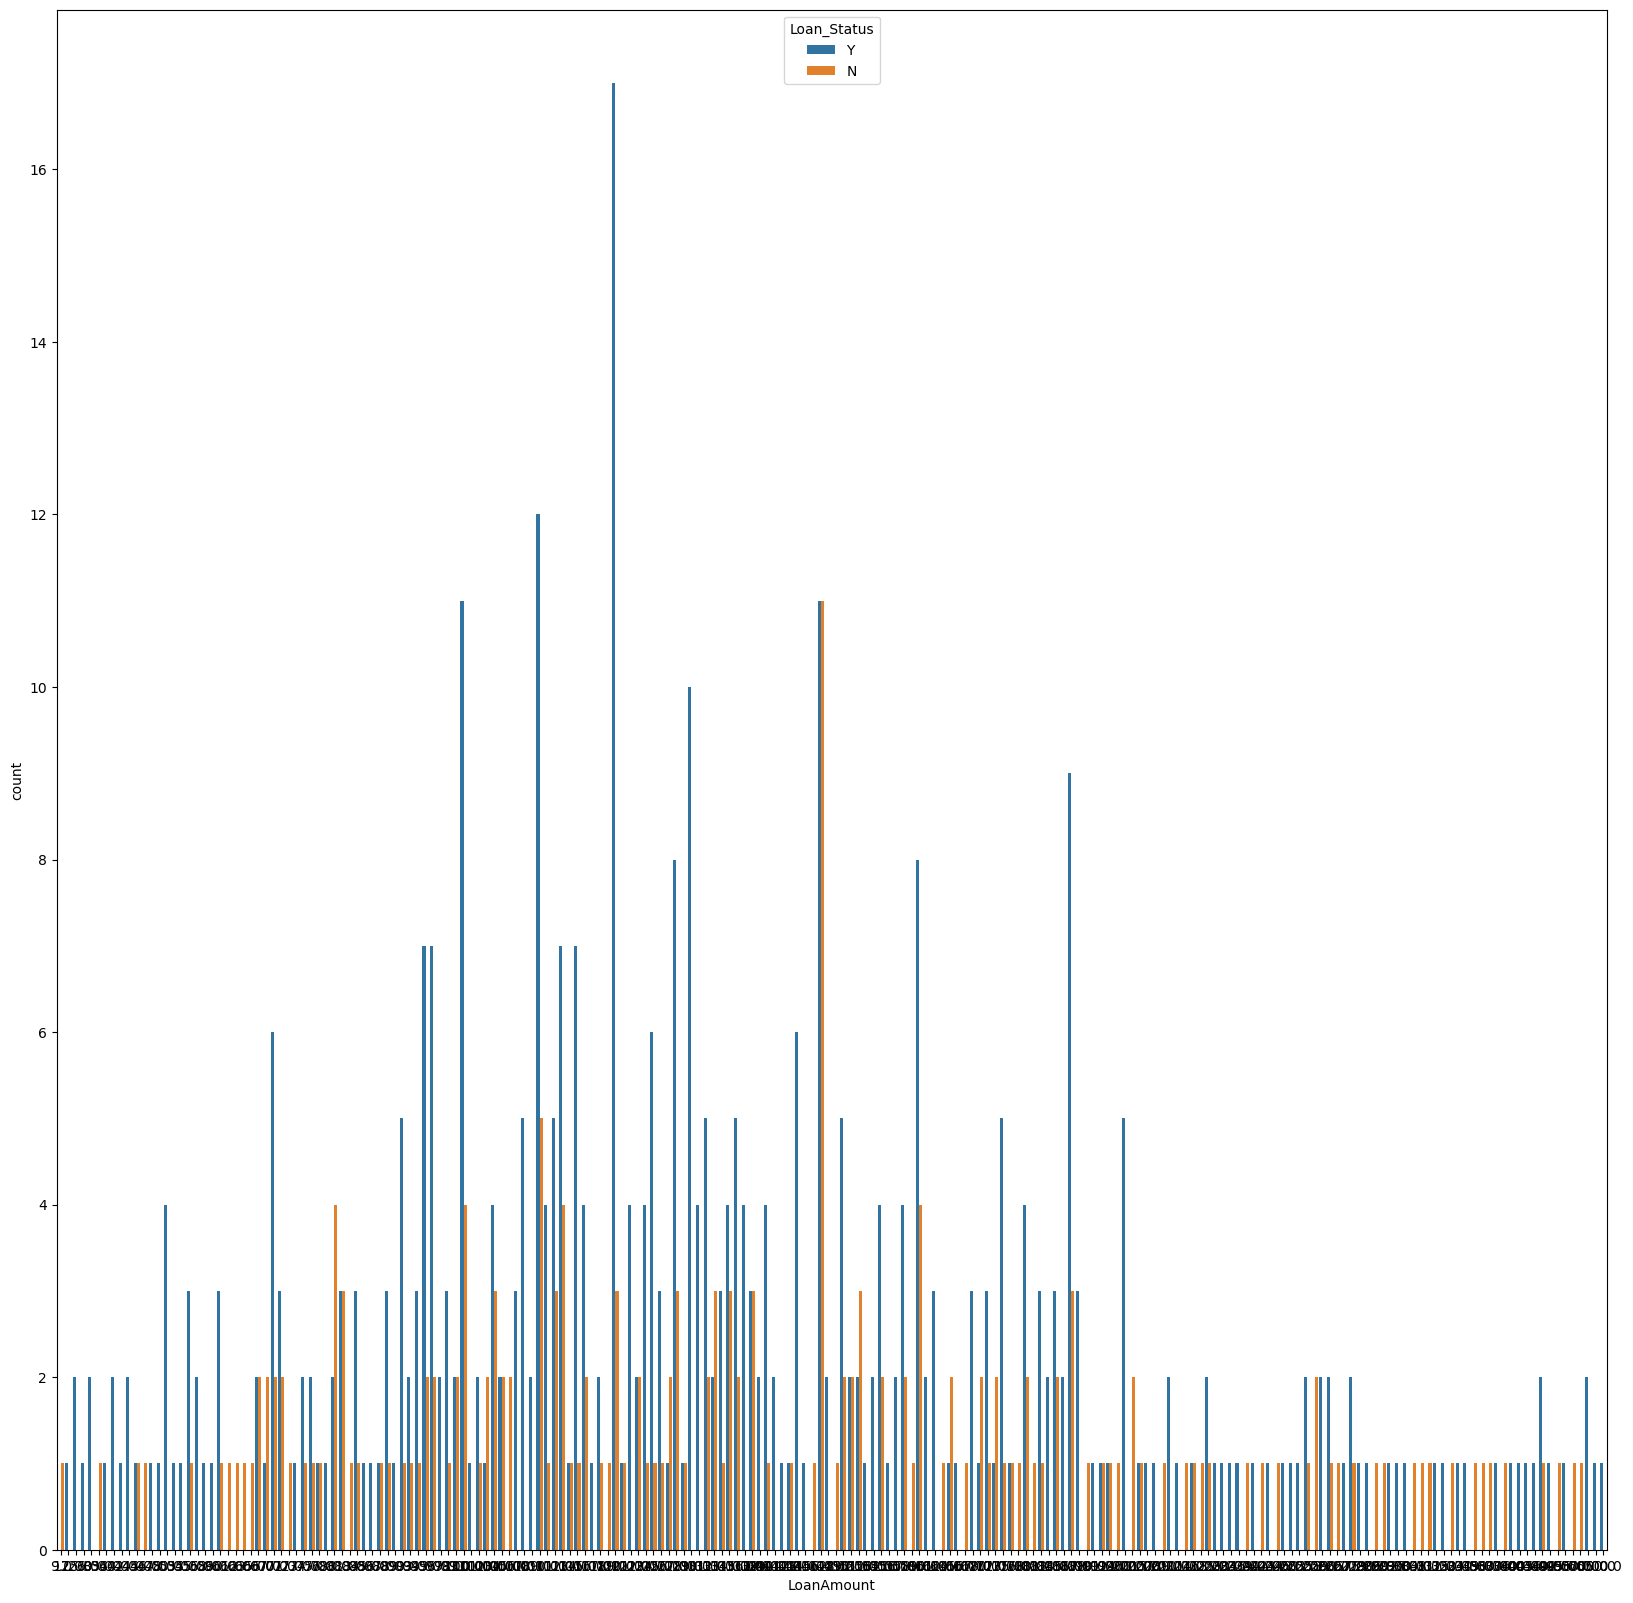

In [47]:
print(data["LoanAmount"].value_counts())
plt.figure(figsize = (20,20))
sns.countplot(data["LoanAmount"],hue=data["Loan_Status"])
plt.show()

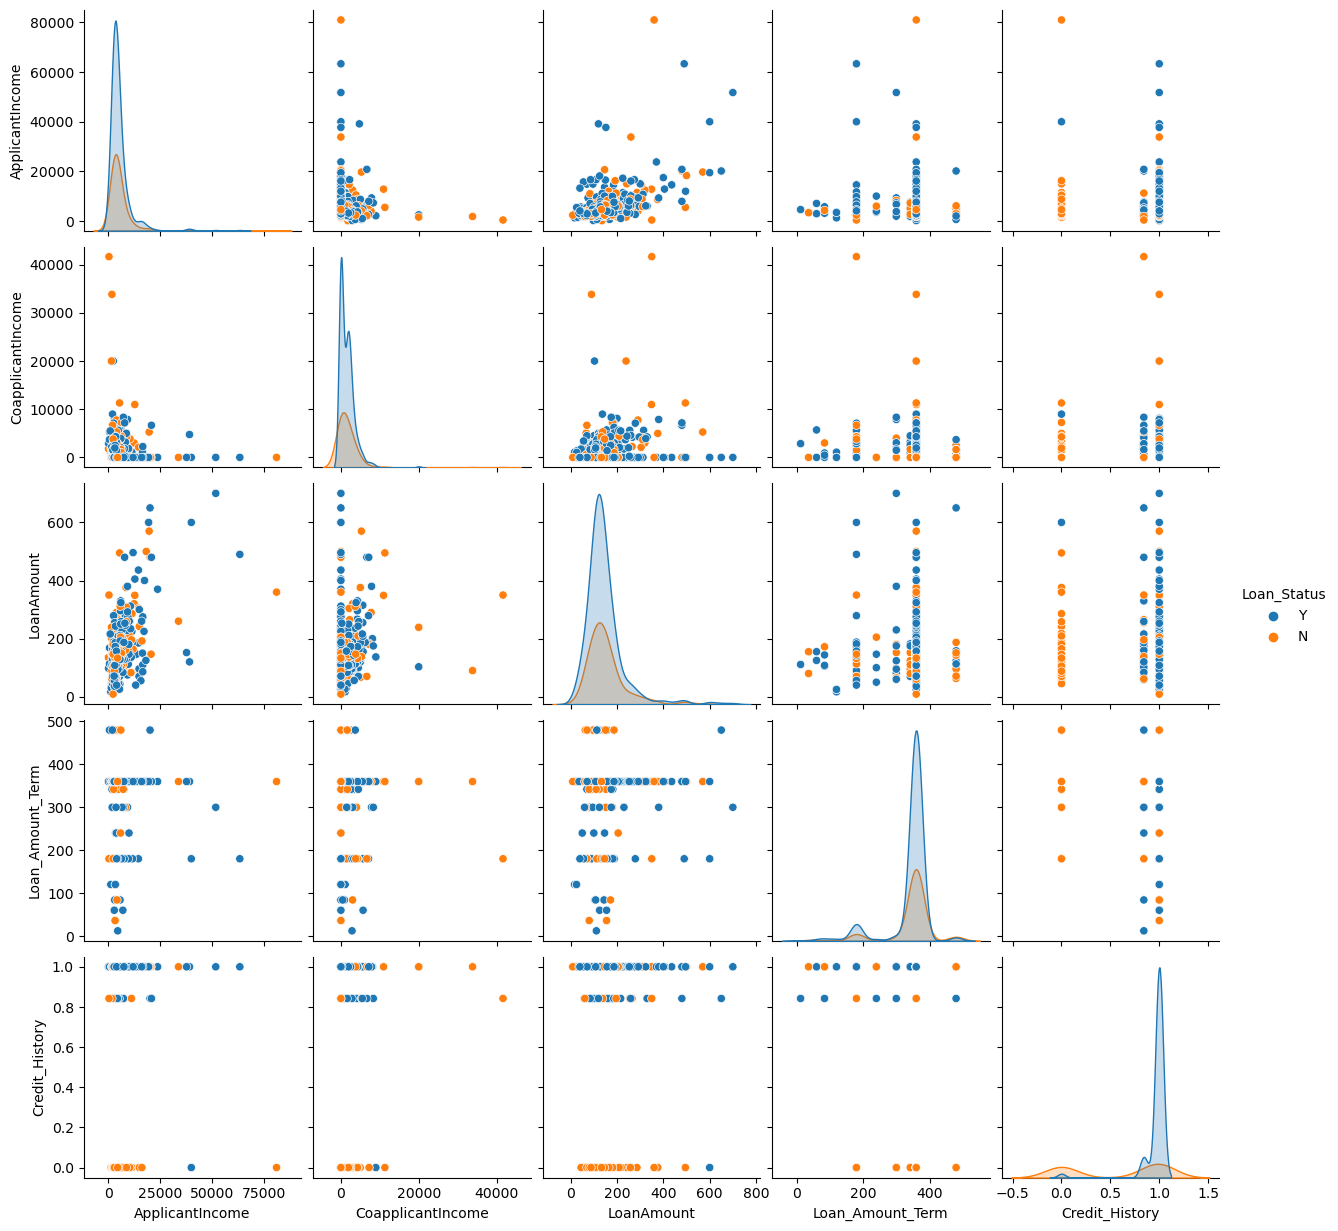

In [48]:
# Using pairplots to explore dataset among features.
sns.pairplot(data,hue="Loan_Status")

ApplicantIncome         AxesSubplot(0.125,0.786098;0.168478x0.0939024)
CoapplicantIncome    AxesSubplot(0.327174,0.786098;0.168478x0.0939024)
LoanAmount           AxesSubplot(0.529348,0.786098;0.168478x0.0939024)
Loan_Amount_Term     AxesSubplot(0.731522,0.786098;0.168478x0.0939024)
Credit_History          AxesSubplot(0.125,0.673415;0.168478x0.0939024)
dtype: object

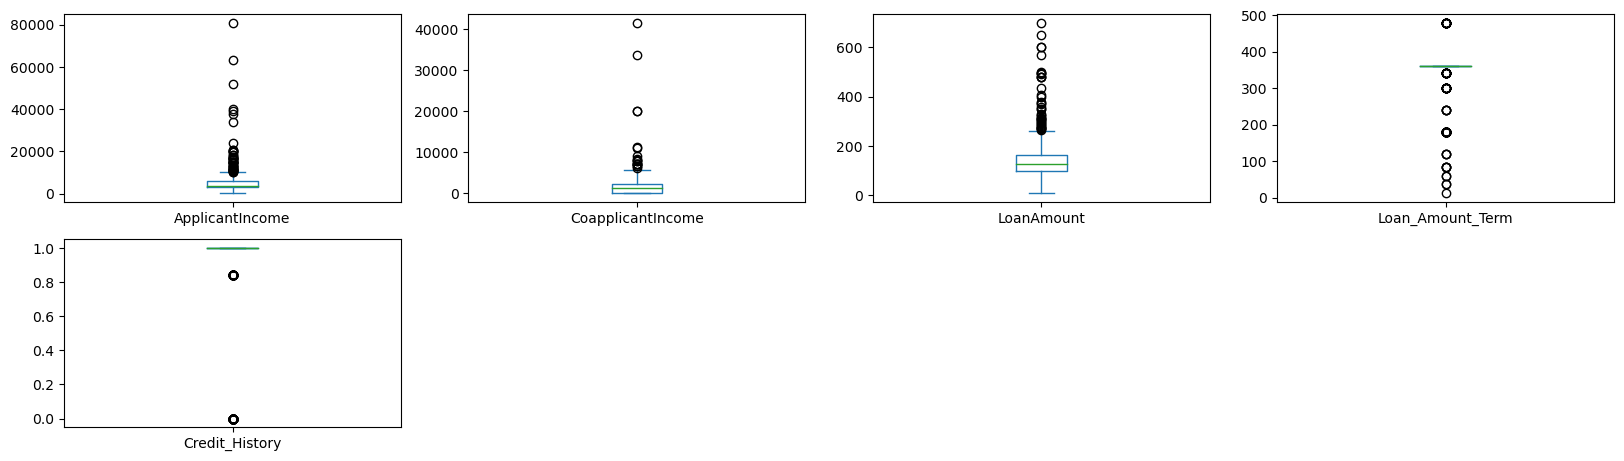

In [49]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,4),figsize=(20,20))

Outliers present in every feature

In [51]:
#As seen before, there are a range of data types. Now converting catagorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Input = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in Input:
    data[i] = le.fit_transform(data[i])

In [52]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


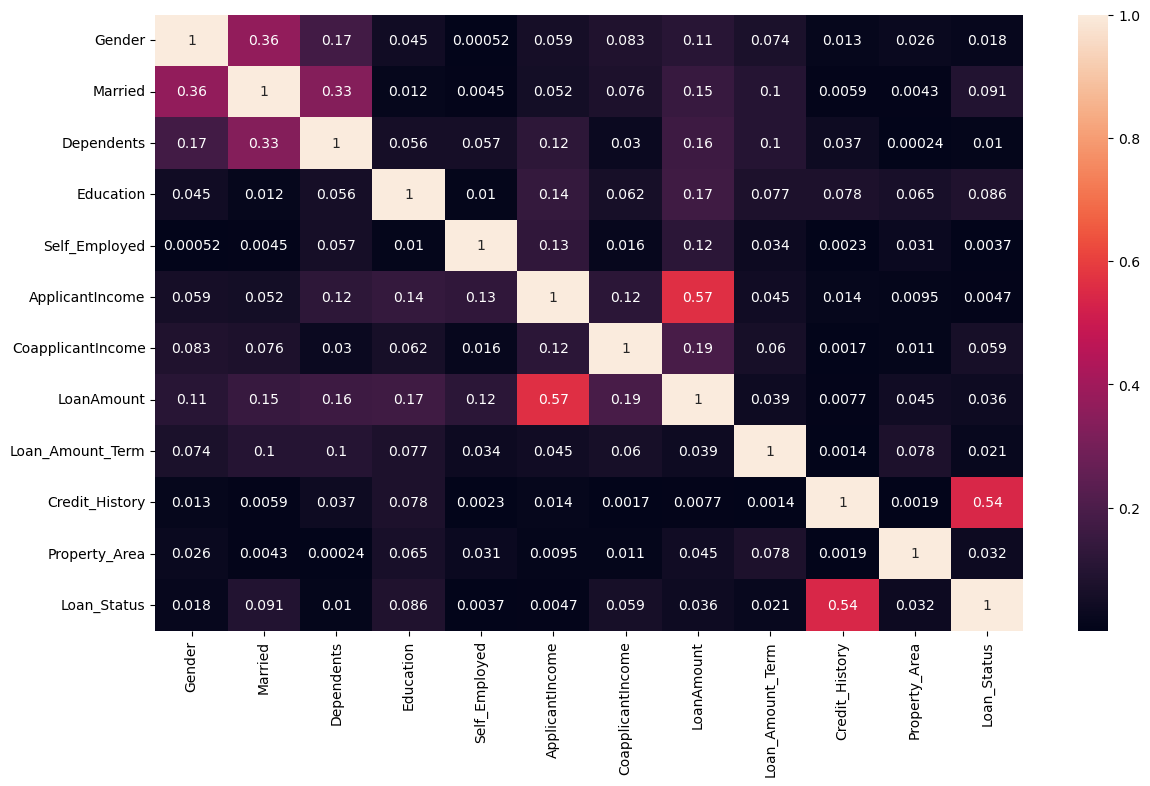

In [53]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

Loan amount and credit history are highest correlated features to target 

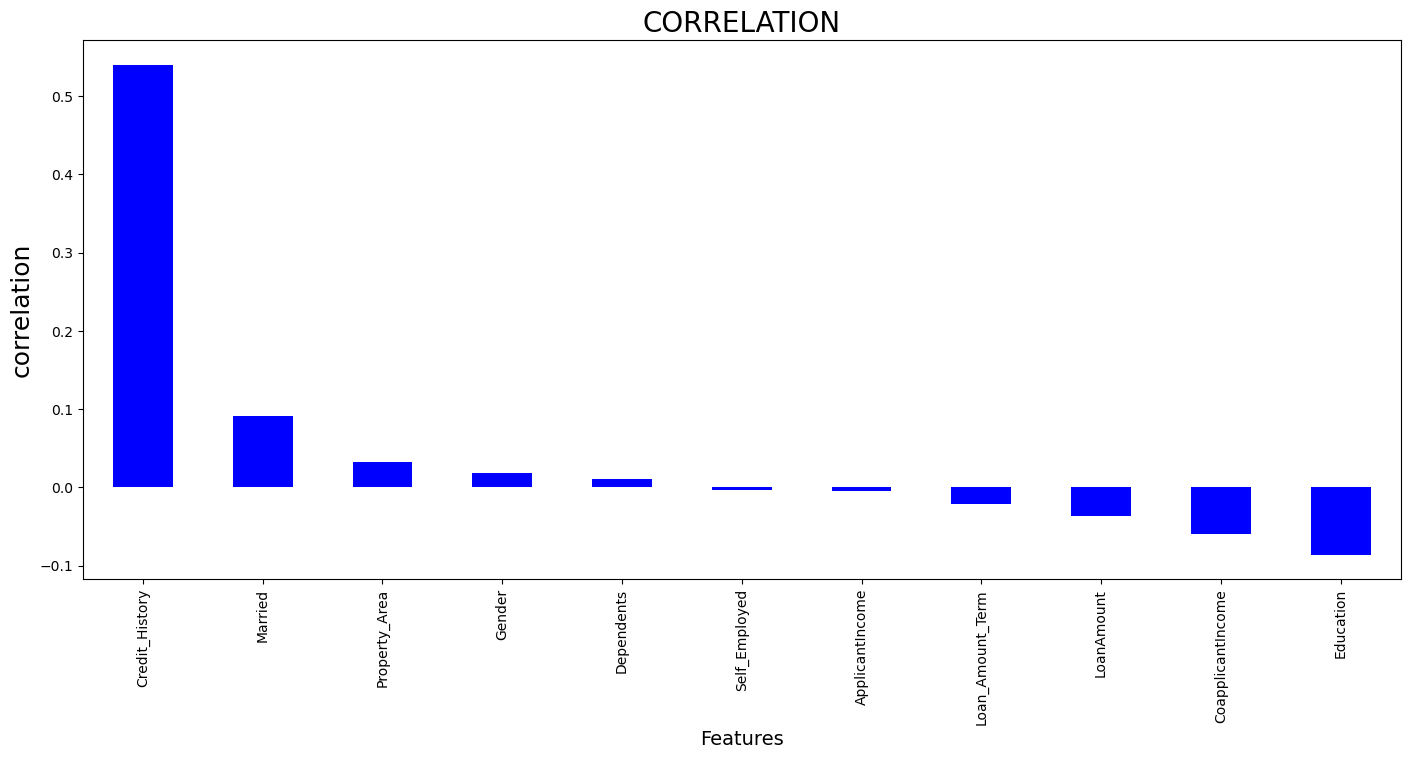

In [54]:
# check positive or negative correlation 
plt.figure(figsize=(17,7))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

Coapplicant income, education, loan amount and term are negatively correlated to target

In [56]:
#confirming correlation amounts 
data.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [57]:
#Using Zscore to remove outliers
data.shape

(614, 12)

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [59]:
#Removing outliers
outliers = np.where(z > threshold)
outlier_rows = outliers[0]
data_new = data.drop(index=data.index[outlier_rows])

In [60]:
data_new.shape

(577, 12)

In [61]:
Dataloss=((614-577)/614)*100
Dataloss

6.026058631921824

6% data loss. This is fine. 

In [65]:
#removingskewness
data_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [64]:
data_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
#Using Yeojohnson to deal with skewness
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [68]:
data_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Skewness reduced

In [69]:
#Separate into dependent and independent variables
x=data_new.drop (columns=['Loan_Status'], axis=1)
y=data_new['Loan_Status']

In [70]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.51523634,
         1.22747207,  0.67063309],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.51523634,
        -1.30652215, -1.49112833],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.51523634,
         1.22747207,  0.67063309],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.51523634,
         1.22747207,  0.67063309],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.51523634,
         1.22747207,  0.67063309],
       [-2.09583477, -1.36251079, -0.80924269, ..., -2.22500746,
        -0.03952504, -1.49112833]])

In [71]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [72]:
#importing ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [73]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80645161 0.76086957 0.82608696 0.7826087  0.82608696]
0.8004207573632538


Promising scores from logistic regression

In [74]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8172043  0.72826087 0.81521739 0.80434783 0.82608696]
0.798223468910706


Very similar scores to LR

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state =1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.72043011 0.69565217 0.68478261 0.76086957 0.76086957]
0.724520804114072


Not as high as previous scores

In [78]:
from sklearn.metrics import make_scorer

rf = RandomForestClassifier()
lr = LogisticRegression()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(accuracy_score), cv=5)
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring=make_scorer(accuracy_score), cv=5)

grid_search_rf.fit(x_train, y_train)
grid_search_lr.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_model_rf = grid_search_rf.best_estimator_
best_model_lr = grid_search_lr.best_estimator_

y_pred_rf = best_model_rf.predict(x_test)
y_pred_lr = best_model_lr.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Best Random Forest Model - Hyperparameters: {best_params_rf}, Accuracy: {accuracy_rf}")
print(f"Best Logistic Regression Model - Hyperparameters: {best_params_lr}, Accuracy: {accuracy_lr}")


Best Random Forest Model - Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}, Accuracy: 0.7931034482758621
Best Logistic Regression Model - Hyperparameters: {'C': 0.1, 'penalty': 'l2'}, Accuracy: 0.7672413793103449


RF is 79% vs LR 76%

In [79]:
rf=RandomForestClassifier(n_estimators= 100, max_depth= 20, min_samples_split=10)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=10)

In [80]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model - Accuracy: {accuracy}")

Random Forest Model - Accuracy: 0.7931034482758621


In [82]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54        36
           1       0.78      0.97      0.87        80

    accuracy                           0.79       116
   macro avg       0.83      0.68      0.70       116
weighted avg       0.81      0.79      0.76       116



In [83]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

x= data.drop (columns= ['Loan_Status'])
y= data ['Loan_Status']
rf = RandomForestClassifier()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
accuracy_scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / n_splits
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.78


In [85]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
1,0,1
4,1,1
13,0,1
14,1,1
20,0,0
...,...,...
585,0,1
597,0,0
599,1,1
608,1,1
